In [2]:
# Installing packages

!python -m pip install nltk==3.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434674 sha256=cd30785c6467d14e6974788d8b1c9fb79c6cd6837bf7234a2d8b7cfe948de905
  Stored in directory: /Users/katarzynaiwaszkiewicz/Library/Caches/pip/wheels/e3/65/f7/494116b0441a27ffddccac4572dad74e7e02e1fe7106b3310f
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [3]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 1.3 MB/s eta 0:00:00a 0:00:01


In [6]:
!pip install pdfquery

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 10.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for pdfquery: filename=pdfquery-0.4.3-py3-none-any.whl size=16781 sha256=16adba50fe7ab36fef3d556c9989c2a78cbe7b2e95a05d2d841b7fcf3b3a1b07
  Stored in directory: /Users/katarzynaiwaszkiewicz/Library/Caches/pip/wheels/cd/a4/8e/0a60850f5ecf4ebd3d78f902b7ee8a4c714b4d4bebefcdb859
Successfully built pdfquery
  Attempting uninstall: cssselect
    Found existing installation: cssselect 1.1.0
    Uninstalling cssselect-1.1.0:
      Successfully uninstalled cssselect-1.1.0


In [230]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from nltk import FreqDist
from wordcloud import WordCloud
from pdfquery import PDFQuery
import urllib.request

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/katarzynaiwaszkiewicz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/katarzynaiwaszkiewicz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/katarzynaiwaszkiewicz/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     /Users/katarzynaiwaszkiewicz/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [249]:
# Retrieving PDF file from the lint to the website 

urllib.request.urlretrieve("https://ia802800.us.archive.org/7/items/standthe/Christine.pdf", "./BookNLP.pdf")

('BookNLP.pdf', <http.client.HTTPMessage at 0x2c26d4760>)

In [257]:
# Loading the book

book = PDFQuery('./BookNLP.pdf')

# We can choose to load the whole book or we can choose a page range, or just chosen pages, as presented below

book.load(*range(5,25))

In [259]:
# Extracting text from the PDF file

book_text = book.pq('LTTextLineHorizontal')
text = [t.text for t in book_text]
print(text)

['', 'This is the story of a lover’s triangle, I suppose you’d say—Arnie Cunningham, Leigh ', 'Cabot, and, of course, Christine. But I want you to understand that Christine was there ', 'first. She was Arnie’s first love, and while I wouldn’t presume to say for sure (not from ', 'whatever heights of wisdom I’ve attained in my twenty-two years, anyway), I think she ', 'was his only true love. So I call what happened a tragedy. ', 'Arnie and I grew up on the same block together, went to Owen Andrews Grammar School ', 'and Darby Junior High together, then to Libertyville High together. I guess I was the main ', 'reason Arnie didn’t just get gobbled up in high school. I was a big guy there—yeah, I ', 'know that doesn’t mean donkeyshit; five years after you’ve graduated you can’t even ', 'cadge a free beer on having been captain of the football and baseball teams and an All- ', 'Conference swimmer—but because I was, Arnie at least never got killed. He took a lot of ', 'abuse, but he never g

In [261]:
# Converting list to string

text_string = ' '.join(map(str,text))

print(text_string)

 This is the story of a lover’s triangle, I suppose you’d say—Arnie Cunningham, Leigh  Cabot, and, of course, Christine. But I want you to understand that Christine was there  first. She was Arnie’s first love, and while I wouldn’t presume to say for sure (not from  whatever heights of wisdom I’ve attained in my twenty-two years, anyway), I think she  was his only true love. So I call what happened a tragedy.  Arnie and I grew up on the same block together, went to Owen Andrews Grammar School  and Darby Junior High together, then to Libertyville High together. I guess I was the main  reason Arnie didn’t just get gobbled up in high school. I was a big guy there—yeah, I  know that doesn’t mean donkeyshit; five years after you’ve graduated you can’t even  cadge a free beer on having been captain of the football and baseball teams and an All-  Conference swimmer—but because I was, Arnie at least never got killed. He took a lot of  abuse, but he never got killed.  He was a loser, you know. 

In [262]:
# Tokenizing sentences from the text string

tokenized_sentences = nltk.tokenize.sent_tokenize(text_string, language='english')

tokenized_sentences

[' This is the story of a lover’s triangle, I suppose you’d say—Arnie Cunningham, Leigh  Cabot, and, of course, Christine.',
 'But I want you to understand that Christine was there  first.',
 'She was Arnie’s first love, and while I wouldn’t presume to say for sure (not from  whatever heights of wisdom I’ve attained in my twenty-two years, anyway), I think she  was his only true love.',
 'So I call what happened a tragedy.',
 'Arnie and I grew up on the same block together, went to Owen Andrews Grammar School  and Darby Junior High together, then to Libertyville High together.',
 'I guess I was the main  reason Arnie didn’t just get gobbled up in high school.',
 'I was a big guy there—yeah, I  know that doesn’t mean donkeyshit; five years after you’ve graduated you can’t even  cadge a free beer on having been captain of the football and baseball teams and an All-  Conference swimmer—but because I was, Arnie at least never got killed.',
 'He took a lot of  abuse, but he never got killed

In [263]:
# Tokenizing words from the text string

tokenized_words = word_tokenize(text_string)

tokenized_words

['This',
 'is',
 'the',
 'story',
 'of',
 'a',
 'lover',
 '’',
 's',
 'triangle',
 ',',
 'I',
 'suppose',
 'you',
 '’',
 'd',
 'say—Arnie',
 'Cunningham',
 ',',
 'Leigh',
 'Cabot',
 ',',
 'and',
 ',',
 'of',
 'course',
 ',',
 'Christine',
 '.',
 'But',
 'I',
 'want',
 'you',
 'to',
 'understand',
 'that',
 'Christine',
 'was',
 'there',
 'first',
 '.',
 'She',
 'was',
 'Arnie',
 '’',
 's',
 'first',
 'love',
 ',',
 'and',
 'while',
 'I',
 'wouldn',
 '’',
 't',
 'presume',
 'to',
 'say',
 'for',
 'sure',
 '(',
 'not',
 'from',
 'whatever',
 'heights',
 'of',
 'wisdom',
 'I',
 '’',
 've',
 'attained',
 'in',
 'my',
 'twenty-two',
 'years',
 ',',
 'anyway',
 ')',
 ',',
 'I',
 'think',
 'she',
 'was',
 'his',
 'only',
 'true',
 'love',
 '.',
 'So',
 'I',
 'call',
 'what',
 'happened',
 'a',
 'tragedy',
 '.',
 'Arnie',
 'and',
 'I',
 'grew',
 'up',
 'on',
 'the',
 'same',
 'block',
 'together',
 ',',
 'went',
 'to',
 'Owen',
 'Andrews',
 'Grammar',
 'School',
 'and',
 'Darby',
 'Junior',
 '

In [264]:
# Obtaining the list of stop words in English language

stop_words = set(stopwords.words("english"))

stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [265]:
#Removing stop words from the data set

no_stop_words = []

for word in tokenized_words:
  if word.casefold() not in stop_words:
    no_stop_words.append(word)

In [83]:
no_stop_words

['story',
 'lover',
 '’',
 'triangle',
 ',',
 'suppose',
 '’',
 'say—Arnie',
 'Cunningham',
 ',',
 'Leigh',
 'Cabot',
 ',',
 ',',
 'course',
 ',',
 'Christine',
 '.',
 'want',
 'understand',
 'Christine',
 'first',
 '.',
 'Arnie',
 '’',
 'first',
 'love',
 ',',
 '’',
 'presume',
 'say',
 'sure',
 '(',
 'whatever',
 'heights',
 'wisdom',
 '’',
 'attained',
 'twenty-two',
 'years',
 ',',
 'anyway',
 ')',
 ',',
 'think',
 'true',
 'love',
 '.',
 'call',
 'happened',
 'tragedy',
 '.',
 'Arnie',
 'grew',
 'block',
 'together',
 ',',
 'went',
 'Owen',
 'Andrews',
 'Grammar',
 'School',
 'Darby',
 'Junior',
 'High',
 'together',
 ',',
 'Libertyville',
 'High',
 'together',
 '.',
 'guess',
 'main',
 'reason',
 'Arnie',
 '’',
 'get',
 'gobbled',
 'high',
 'school',
 '.',
 'big',
 'guy',
 'there—yeah',
 ',',
 'know',
 '’',
 'mean',
 'donkeyshit',
 ';',
 'five',
 'years',
 '’',
 'graduated',
 '’',
 'even',
 'cadge',
 'free',
 'beer',
 'captain',
 'football',
 'baseball',
 'teams',
 'All-',
 'Conf

In [266]:
# We can check tags to see if we obtained desired data

nltk.pos_tag(tokenized_words)

[('This', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('story', 'NN'),
 ('of', 'IN'),
 ('a', 'DT'),
 ('lover', 'NN'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('triangle', 'NN'),
 (',', ','),
 ('I', 'PRP'),
 ('suppose', 'VBP'),
 ('you', 'PRP'),
 ('’', 'VBP'),
 ('d', 'JJ'),
 ('say—Arnie', 'NN'),
 ('Cunningham', 'NNP'),
 (',', ','),
 ('Leigh', 'NNP'),
 ('Cabot', 'NNP'),
 (',', ','),
 ('and', 'CC'),
 (',', ','),
 ('of', 'IN'),
 ('course', 'NN'),
 (',', ','),
 ('Christine', 'NNP'),
 ('.', '.'),
 ('But', 'CC'),
 ('I', 'PRP'),
 ('want', 'VBP'),
 ('you', 'PRP'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('that', 'DT'),
 ('Christine', 'NNP'),
 ('was', 'VBD'),
 ('there', 'EX'),
 ('first', 'RB'),
 ('.', '.'),
 ('She', 'PRP'),
 ('was', 'VBD'),
 ('Arnie', 'NNP'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('first', 'JJ'),
 ('love', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('while', 'IN'),
 ('I', 'PRP'),
 ('wouldn', 'VBP'),
 ('’', 'JJ'),
 ('t', 'NN'),
 ('presume', 'NN'),
 ('to', 'TO'),
 ('say', 'VB'),
 ('for', 'IN'),
 ('sure', 'JJ'

In [267]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [268]:
# Creating a frequency distribution

word_frequency = FreqDist(no_stop_words)
print(word_frequency)

<FreqDist with 1965 samples and 5632 outcomes>


In [276]:
# We can see that there is some unwanted data like '.' or '?' that is not a word. We need to further clean our data.

word_frequency.most_common(30)

[('.', 528),
 (',', 453),
 ('’', 217),
 ('“', 126),
 ('”', 123),
 ('Arnie', 97),
 ('said', 52),
 ('like', 34),
 ('looked', 32),
 ('one', 31),
 ('could', 31),
 ('old', 31),
 ('?', 30),
 ('back', 30),
 ('car', 29),
 (';', 28),
 ('LeBay', 28),
 ('got', 27),
 ('Regina', 23),
 ('way', 22),
 ('little', 22),
 ('going', 18),
 ('think', 17),
 ('get', 17),
 ('something', 17),
 ('would', 17),
 ('know', 16),
 ('never', 16),
 ('home', 16),
 ('Michael', 16)]

In [277]:
# Removing punctuation marks from the list

import string

new_no_stop_words = []
for word in no_stop_words:
    for character in word:
        if character in string.punctuation:
            word = word.replace(character,"")   
    new_no_stop_words.append(word)

print(new_no_stop_words)

['story', 'lover', '’', 'triangle', '', 'suppose', '’', 'say—Arnie', 'Cunningham', '', 'Leigh', 'Cabot', '', '', 'course', '', 'Christine', '', 'want', 'understand', 'Christine', 'first', '', 'Arnie', '’', 'first', 'love', '', '’', 'presume', 'say', 'sure', '', 'whatever', 'heights', 'wisdom', '’', 'attained', 'twentytwo', 'years', '', 'anyway', '', '', 'think', 'true', 'love', '', 'call', 'happened', 'tragedy', '', 'Arnie', 'grew', 'block', 'together', '', 'went', 'Owen', 'Andrews', 'Grammar', 'School', 'Darby', 'Junior', 'High', 'together', '', 'Libertyville', 'High', 'together', '', 'guess', 'main', 'reason', 'Arnie', '’', 'get', 'gobbled', 'high', 'school', '', 'big', 'guy', 'there—yeah', '', 'know', '’', 'mean', 'donkeyshit', '', 'five', 'years', '’', 'graduated', '’', 'even', 'cadge', 'free', 'beer', 'captain', 'football', 'baseball', 'teams', 'All', 'Conference', 'swimmer—but', '', 'Arnie', 'least', 'never', 'got', 'killed', '', 'took', 'lot', 'abuse', '', 'never', 'got', 'kille

In [279]:
# Removing empty strings

result = list(filter(None, new_no_stop_words))

print(result)

['story', 'lover', '’', 'triangle', 'suppose', '’', 'say—Arnie', 'Cunningham', 'Leigh', 'Cabot', 'course', 'Christine', 'want', 'understand', 'Christine', 'first', 'Arnie', '’', 'first', 'love', '’', 'presume', 'say', 'sure', 'whatever', 'heights', 'wisdom', '’', 'attained', 'twentytwo', 'years', 'anyway', 'think', 'true', 'love', 'call', 'happened', 'tragedy', 'Arnie', 'grew', 'block', 'together', 'went', 'Owen', 'Andrews', 'Grammar', 'School', 'Darby', 'Junior', 'High', 'together', 'Libertyville', 'High', 'together', 'guess', 'main', 'reason', 'Arnie', '’', 'get', 'gobbled', 'high', 'school', 'big', 'guy', 'there—yeah', 'know', '’', 'mean', 'donkeyshit', 'five', 'years', '’', 'graduated', '’', 'even', 'cadge', 'free', 'beer', 'captain', 'football', 'baseball', 'teams', 'All', 'Conference', 'swimmer—but', 'Arnie', 'least', 'never', 'got', 'killed', 'took', 'lot', 'abuse', 'never', 'got', 'killed', 'loser', 'know', 'Every', 'high', 'school', 'least', 'two', '’', 'like', 'national', 'la

In [280]:
# Removing apostrophes and brackets

unwanted_items = ['’','“','”']

result2 = set(unwanted_items)
result3 = [x for x in result if x not in result2]

print(result3)

['story', 'lover', 'triangle', 'suppose', 'say—Arnie', 'Cunningham', 'Leigh', 'Cabot', 'course', 'Christine', 'want', 'understand', 'Christine', 'first', 'Arnie', 'first', 'love', 'presume', 'say', 'sure', 'whatever', 'heights', 'wisdom', 'attained', 'twentytwo', 'years', 'anyway', 'think', 'true', 'love', 'call', 'happened', 'tragedy', 'Arnie', 'grew', 'block', 'together', 'went', 'Owen', 'Andrews', 'Grammar', 'School', 'Darby', 'Junior', 'High', 'together', 'Libertyville', 'High', 'together', 'guess', 'main', 'reason', 'Arnie', 'get', 'gobbled', 'high', 'school', 'big', 'guy', 'there—yeah', 'know', 'mean', 'donkeyshit', 'five', 'years', 'graduated', 'even', 'cadge', 'free', 'beer', 'captain', 'football', 'baseball', 'teams', 'All', 'Conference', 'swimmer—but', 'Arnie', 'least', 'never', 'got', 'killed', 'took', 'lot', 'abuse', 'never', 'got', 'killed', 'loser', 'know', 'Every', 'high', 'school', 'least', 'two', 'like', 'national', 'law', 'One', 'male', 'one', 'female', 'Everyone', 'd

In [281]:
# Creating once again a frequency distribution

new_word_frequency = FreqDist(result3)
print(new_word_frequency)

<FreqDist with 1932 samples and 4079 outcomes>


In [283]:
common = new_word_frequency.most_common(30)

common

[('Arnie', 97),
 ('said', 52),
 ('like', 34),
 ('looked', 32),
 ('one', 31),
 ('could', 31),
 ('old', 31),
 ('back', 30),
 ('car', 30),
 ('LeBay', 28),
 ('got', 27),
 ('way', 23),
 ('Regina', 23),
 ('little', 22),
 ('going', 18),
 ('think', 17),
 ('get', 17),
 ('something', 17),
 ('would', 17),
 ('know', 16),
 ('never', 16),
 ('home', 16),
 ('Michael', 16),
 ('first', 15),
 ('around', 15),
 ('time', 15),
 ('even', 14),
 ('came', 14),
 ('face', 14),
 ('good', 14)]

In [284]:
# Creating data frame out of word frequency dictionary
# The result is shown in the form of a table

import pandas as pd

word_freq = pd.DataFrame(common,columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq

,word,frequency
0,Arnie,97
1,said,52
2,like,34
3,looked,32
4,one,31
5,could,31
6,old,31
8,car,30
7,back,30
9,LeBay,28


<Axes: xlabel='frequency', ylabel='word'>

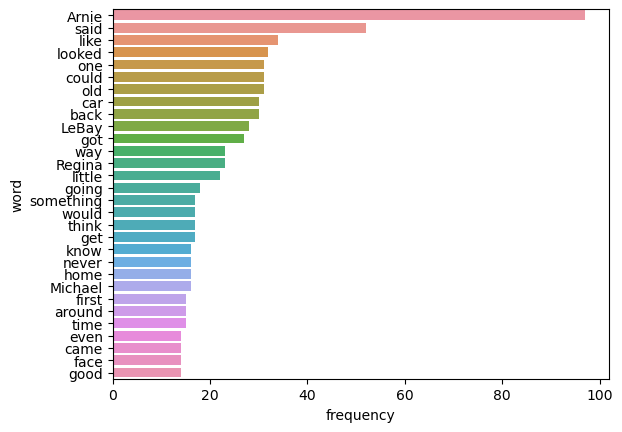

In [285]:
# We can also show word frequency distribution on a bar chart

sns.barplot(word_freq,x='frequency',y='word')

In [286]:
#Creating new text string out of a cleared list

new_text_string =' '.join(result3)

new_text_string

'story lover triangle suppose say—Arnie Cunningham Leigh Cabot course Christine want understand Christine first Arnie first love presume say sure whatever heights wisdom attained twentytwo years anyway think true love call happened tragedy Arnie grew block together went Owen Andrews Grammar School Darby Junior High together Libertyville High together guess main reason Arnie get gobbled high school big guy there—yeah know mean donkeyshit five years graduated even cadge free beer captain football baseball teams All Conference swimmer—but Arnie least never got killed took lot abuse never got killed loser know Every high school least two like national law One male one female Everyone dumping ground bad day Flunked big test argument folks got grounded weekend problem find one poor sad sacks go scurrying around halls like criminals homeroom bell walk right sometimes get killed every important way except physical sometimes find something hold onto survive Arnie Christine Leigh came later Arni

In [287]:
# Creating Word Cloud out of a new text string

wordcloud = WordCloud().generate(new_text_string)

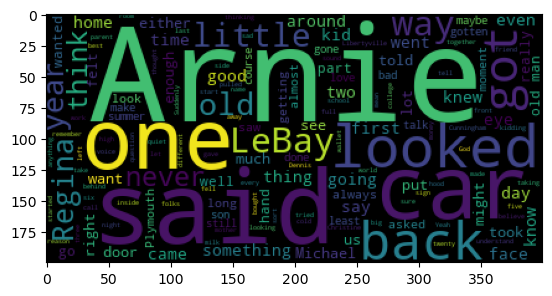

In [288]:
plt.imshow(wordcloud)